In [1]:
import pandas as pd
import nltk
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [ ]:
os.chdir("/content/drive/MyDrive/mlasgmt")
os.getcwd()

In [ ]:
df = pd.read_excel("train.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'train.xlsx'

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.shape

(2061, 3)

## Exploratory data analysis

In [ ]:
textLen = df['text'].str.len()
reasonLen = df['reason'].str.len()

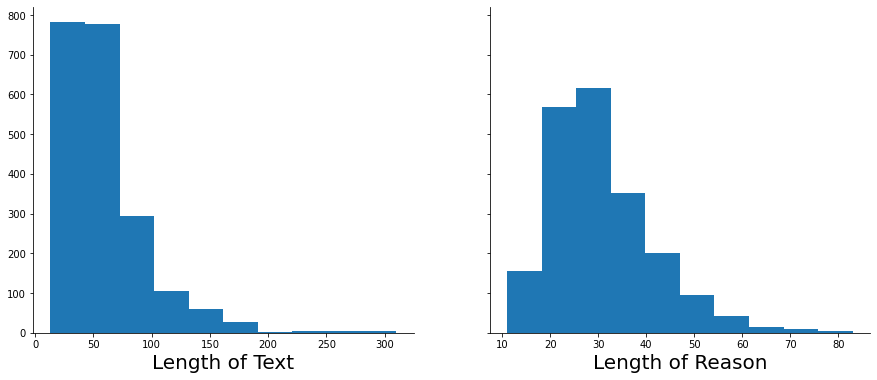

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,6), sharey=True)
_ = ax[0].hist(textLen)
_ = ax[1].hist(reasonLen)
ax[0].set_xlabel("Length of Text", fontsize=20)
# ax[0].set_ylabel("Count", fontsize=20)
ax[1].set_xlabel("Length of Reason", fontsize=20)
sns.despine()

In [ ]:
textWordLen = df["text"].str.split().map(lambda x: len(x))
reasonWordLen = df["reason"].str.split().map(lambda x: len(x))

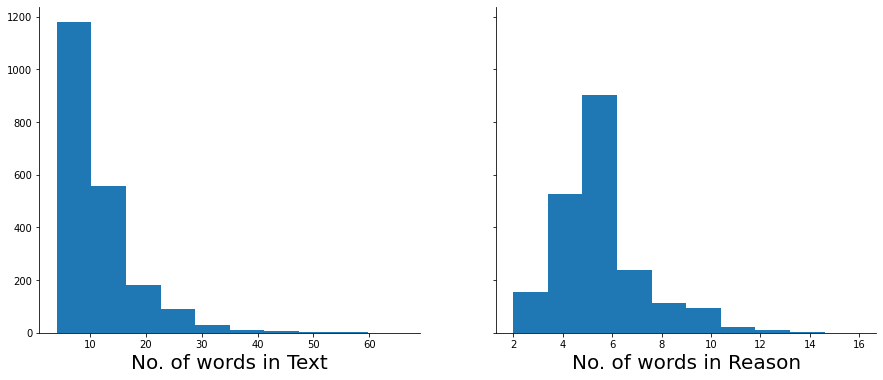

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,6), sharey=True)
_ = ax[0].hist(textWordLen)
_ = ax[1].hist(reasonWordLen)
ax[0].set_xlabel("No. of words in Text", fontsize=20)
# ax[0].set_ylabel("Count", fontsize=20)
ax[1].set_xlabel("No. of words in Reason", fontsize=20)
sns.despine()

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [ ]:
stop=set(stopwords.words('english'))

In [ ]:
corpus=[]
new = df['text'].str.split()
new = new.values.tolist()
corpus=[word for i in new for word in i]

dic=defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
xtext, ytext =zip(*top)

In [ ]:
len(dic.keys())

110

In [ ]:
corpus=[]
new = df['reason'].str.split()
new = new.values.tolist()
corpus=[word for i in new for word in i]

dic=defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
xreason, yreason=zip(*top)

In [ ]:
len(dic.keys())

73

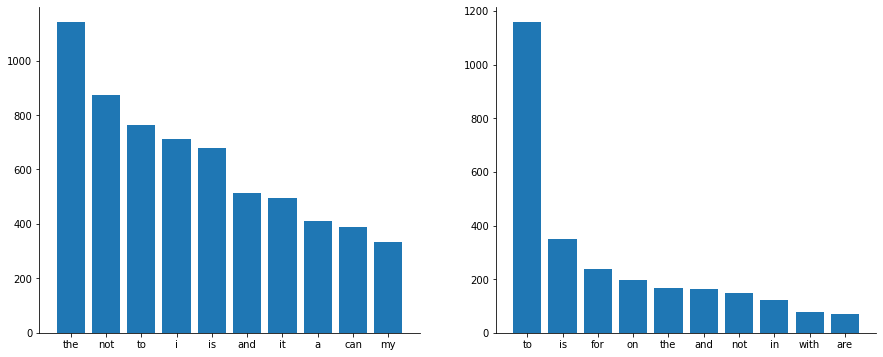

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].bar(xtext,ytext)
ax[1].bar(xreason,yreason)
sns.despine()

## Preprocess Tweets

 - We didn't remove stopwords bcoz its give meaning semantic comparison

In [ ]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import string, re
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [ ]:
def remove_punc(data):
    trans = str.maketrans(' ','', string.punctuation)
    return data.translate(trans)
def remove_punctuation(text):
    translator = re.compile('[%s]' % re.escape(string.punctuation))
    text = translator.sub(" ",text)
    return text
def remove_white_space(data):
    return ' '.join(data.split())

In [ ]:
def stemming(data):
    stemmer = LancasterStemmer()
    stemmed = []
    for i in data:
        stem = stemmer.stem(i)
        stemmed.append(stem)
    return stemmed

In [ ]:
def lemmatization(data):
    lemma = WordNetLemmatizer()
    lemmas = []
    for i in data:
        lem = lemma.lemmatize(i, pos='v')
        lemmas.append(lem)
    return lemmas  

In [ ]:
def preprocessText(text):
    text = text.lower()
    text = re.sub(r"[\([{})\]]", "", text) ## removing brackets
    text = remove_punctuation(text)
    text = remove_white_space(text)
    tokens = nltk.word_tokenize(text)
    tokens = lemmatization(tokens)
    return " ".join(tokens)

In [ ]:
df["clean_text"] = df["text"].map(preprocessText)

In [ ]:
df.head()

,text,reason,label,clean_text
0,this is an amazing app for online classes!but,good app for conducting online classes,1.0,this be an amaze app for online class but
1,very practical and easy to use,app is user-friendly,1.0,very practical and easy to use
2,this app is very good for video conferencing.,good for video conferencing,1.0,this app be very good for video conferencing
3,i can not download this zoom app,unable to download zoom app,1.0,i can not download this zoom app
4,i am not able to download this app,want to download the app,1.0,i be not able to download this app


In [ ]:
df.to_csv("train.csv")

In [ ]:
df_test = pd.read_excel("dataset/evaluation.xlsx")

In [ ]:
df_test["clean_text"] = df["text"].map(preprocessText)

In [ ]:
df_test.to_csv("evaluation.csv")

## Data Augmentation

In [7]:
os.chdir("/content/drive/MyDrive/Github")

In [9]:
!git pull https://github.com/rohit-khoiwal-30/msgmt.git

remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 8), reused 7 (delta 3), pack-reused 0
Unpacking objects: 100% (17/17), done.
From https://github.com/rohit-khoiwal-30/msgmt
 * branch            HEAD       -> FETCH_HEAD
Updating 293f5ec..a77fca4
Fast-forward
 .ipynb_checkpoints/preprocess-checkpoint.ipynb | 1003 ++++++++++++++++++++++
 bertCONCT.ipynb                                |  963 +++++++++++++--------
 bertEUCL.ipynb                                 |  870 +++++++++++--------
 bertTripleLoss.ipynb                           | 1058 ++++++++++++++++--------
 preprocess.ipynb                               |  339 +++++---
 useCONCT -.ipynb                               |  366 --------
 useCONCT.ipynb                                 |  611 ++++++++++++++
 useEUCL-checkpoint.ipynb                       |  518 ------------
 useEUCL.ipynb                                  |  834 ++

In [22]:
%pip install -q nlpaug
%pip install -q transformers
%pip install -q gensim==4.1.2

In [81]:
import pandas as pd
df = pd.read_csv('train.csv')

In [82]:
import nlpaug.flow as naf
import nlpaug.augmenter.word as naw

In [167]:
def augment_dataset(texts, reasons):
    aug_bert1 = naw.ContextualWordEmbsAug(model_path='distilbert-base-uncased', device='cuda', action="insert", top_k=5, aug_p=0.2)
    aug_bert2 = naw.ContextualWordEmbsAug(model_path='distilbert-base-uncased', device='cuda', action="substitute", top_k=5, aug_p=0.2)

    aug = naf.Sometimes([aug_bert1, aug_bert2], aug_p=0.2)
    fn  = lambda x : aug.augment(x, n=3)

    newTexts = list(map(fn, texts))
    newReasons = list(map(fn, reasons))
    
    texts.extend(list(itertools.chain(*newTexts)))
    reasons.extend(list(itertools.chain(*newReasons)))

    assert len(texts) == len(reasons)
    return texts, reasons

In [168]:
texts, reasons = augment_dataset(list(df['text']), list(df['reason']))

In [169]:
new_df = pd.DataFrame()

In [170]:
new_df["texts"] = texts
new_df["reason"] = reasons
new_df['label'] = [1]*len(texts)

In [171]:
new_df

,texts,reason,label
0,this is an amazing app for online classes!but,good app for conducting online classes,1
1,very practical and easy to use,app is user-friendly,1
2,this app is very good for video conferencing.,good for video conferencing,1
3,i can not download this zoom app,unable to download zoom app,1
4,i am not able to download this app,want to download the app,1
...,...,...,...
8194,it is a shame that disney + does indeed not wo...,• unable to use the disney plus on tv,1
8195,it is worth shame that disney + does no featur...,· unable to use disney plus on apple tv,1
8196,apparently i have planned to close and reload ...,sound keeps growing even after closing their app,1
8197,i just have to close and reload all the app ov...,sound keeps playing even though closing its app,1


In [172]:
new_df.to_csv('augment_train.csv')